# Naive Bayes

## Imports

In [26]:
#TODO: Added libaries and tools
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import os # to retrive data-set files
import cv2 # computer vision for extracting features from images
import seaborn as sns # Visuals

In [27]:
# All the Bayes Classifiers! -- What ones was I suggested to use?
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import ComplementNB
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import CategoricalNB

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Utility Functions

In [32]:
# function to load dataset into a data frame
# Encaplsated in a function to restrict the scope of variables that will not be needed in
# later code blocks.
# gray scale flag, by default it's off
# ResizeX and ResizeY, fills these to resize image to desired size, if either
# is 0 it's assumed to be off
def loadData(grayscale:bool = False, resizeX: int = 0, resizeY = 0):
    # helper function to fill the data variables with data from images
    def fillData(data: dict,dir: str, label:str):
        # list of all files in dir
        # these values are the image files
        list = os.listdir(dir)
        # append image paths and labels in data dictionary
        for image in list:
            absImagePath = os.path.join(dir,image)
            data['image'].append(absImagePath)
            data['label'].append(label)
            fileImage = cv2.imread(absImagePath)
            # image gray scale
            if(grayscale == True):
                fileImage = cv2.cvtColor(fileImage,cv2.COLOR_BGR2GRAY)
            if(resizeX > 0 and resizeY > 0):
                target_size = (resizeX,resizeY)
                fileImage = cv2.resize(fileImage,target_size)
            # Bryan Temp
            # if it's color mode, reshape into 3-tuples(RGB)
            if(grayscale == False):
                data['features'].append(fileImage.reshape((-1,3)))
            # else if it's gray scale, just flatten it
            else: data['features'].append(fileImage.flatten())
            
    # dictionary to temporary house the data
    # image = image path list, label = fake or real
    trainData = {'image':[],'label':[], 'features':[]}
    testData = {'image':[],'label':[], 'features':[]}
   
    # Read Train folder & Read test folder
    # OS module used to ensure this works on all platforms that python runs on
    currentDir = os.getcwd() # get's current directory to later append to image filepath for abs path
    trainDirReal = os.path.join(currentDir,"train",'REAL') # abs file path to real class folder in training
    trainDirFake = os.path.join(currentDir,'train','FAKE')
    testDirReal = os.path.join(currentDir,"test",'REAL')
    testDirFake = os.path.join(currentDir,"test",'FAKE')  


    # helper function read file list from each folder and append abs path and labels
    fillData(trainData,trainDirReal,'REAL')
    fillData(trainData,trainDirFake,'FAKE')
    fillData(testData,testDirReal,'REAL')
    fillData(testData,testDirFake,'FAKE')
    
    #TODO: Feature extraction
    
    # converts from dictionary type to dataframe for ease of access and compadability with
    # ML library function calls
    return pd.DataFrame(trainData), pd.DataFrame(testData)


# executes function, returning 2 dataframes containing train and test data of the calsses
# Train and test data are seperated into different dataframes to enforce data hygiene 
trainData_Color,testData_Color = loadData()

trainData_Grey,testData_Grey = loadData(grayscale=False) # Need to fix greyscale data

# test if data was loaded successfully by outputing first 10 entries
trainData_Grey.head(10)

,image,label,features
0,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[146, 166, 124], [137, 142, 80], [218, 189, 8..."
1,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[237, 218, 227], [219, 205, 211], [209, 202, ..."
2,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[195, 174, 176], [193, 175, 176], [194, 176, ..."
3,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[74, 102, 133], [0, 23, 53], [3, 20, 47], [35..."
4,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[181, 165, 152], [182, 166, 153], [183, 167, ..."
5,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[56, 37, 29], [48, 31, 22], [81, 63, 56], [17..."
6,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[90, 92, 92], [86, 88, 88], [66, 67, 71], [86..."
7,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[160, 211, 207], [156, 207, 200], [178, 222, ..."
8,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[110, 98, 98], [112, 100, 100], [115, 102, 10..."
9,/home/mharper/Dropbox/GitHub/ML-Project/train/...,REAL,"[[252, 252, 255], [250, 253, 255], [243, 251, ..."


## Model

In [42]:

# Extraction for Colored Images 
## Extract for training 
Y_train_color = np.asarray(trainData_Color['label'].to_list())
X_train_color = np.asarray(trainData_Color['features'].to_list())[:, :, 0]
## Extract for test 
Y_test_color = np.asarray(testData_Color['label'].to_list())
X_test_color = np.asarray(testData_Color['features'].to_list())[:, :, 0]

# Extraction for Grey Scaled Images 
## Extract for training 
Y_train_grey = np.asarray(trainData_Grey['label'].to_list())
X_train_grey = np.asarray(trainData_Grey['features'].to_list())[:, :, 0]
## Extract for test 
Y_test_grey = np.asarray(testData_Grey['label'].to_list())
X_test_grey = np.asarray(testData_Grey['features'].to_list())[:, :, 0]

# Create a models
## Colored Images  
gnb_color = GaussianNB()
## GreyScaled images
gnb_grey = GaussianNB()


# Fit
## Colored Images
Y_pred_color = gnb_color.fit(X_train_color, Y_train_color).predict(X_test_color)
## Greyscaled 
Y_pred_grey = gnb_grey.fit(X_train_grey, Y_train_grey).predict(X_test_grey)


# Calculate Metrics for Colored
## Accuracy Score
acc_score_colored = accuracy_score(Y_test_color, Y_pred_color)
## Confusion Matrix 
conf_mat_colored = confusion_matrix(Y_test_color, Y_pred_color)

# Calculate Metrics for Grey
## Accuracy Score
acc_score_grey = accuracy_score(Y_test_grey, Y_pred_grey)
## Confusion Matrix 
conf_mat_grey = confusion_matrix(Y_test_grey, Y_pred_grey)

## Model Metric Outputs

### Colored

Gaussian Naive Bayes:
Number of mislabeled points out of a total 10000 points for Colored Gaussian Naive Bayes: 3956
Accuracy Score of Colored Gaussian Naive Bayes: 0.6044
[[3078 1922]
 [2034 2966]]


<Axes: >

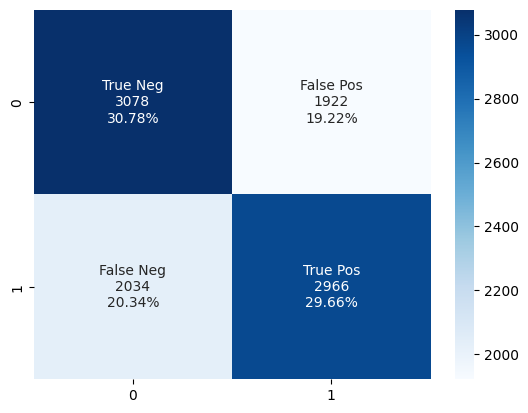

In [43]:
# Output Colored
print("Gaussian Naive Bayes:")
print("Number of mislabeled points out of a total %d points for Colored Gaussian Naive Bayes: %d" % (X_test_color.shape[0], (Y_test_color != Y_pred_color).sum()))
print(f"Accuracy Score of Colored Gaussian Naive Bayes: {acc_score_colored}")
print(conf_mat_colored)


## Taken from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts_colored = ["{0:0.0f}".format(value) for value in
                conf_mat_colored.flatten()]
group_percentages_colored = ["{0:.2%}".format(value) for value in
                     conf_mat_colored.flatten()/np.sum(conf_mat_colored)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts_colored,group_percentages_colored)]
labels = np.asarray(labels).reshape(2,2)

## Print the Colored Confusion Matrix
sns.heatmap(conf_mat_colored, annot=labels, fmt='', cmap='Blues')

### Grey

In [44]:
# Output grey
print("Gaussian Naive Bayes:")
print("Number of mislabeled points out of a total %d points for Colored Gaussian Naive Bayes: %d" % (X_test_grey.shape[0], (Y_test_grey != Y_pred_grey).sum()))
print(f"Accuracy Score of Colored Gaussian Naive Bayes: {acc_score_grey}")

Gaussian Naive Bayes:
Number of mislabeled points out of a total 10000 points for Colored Gaussian Naive Bayes: 3956
Accuracy Score of Colored Gaussian Naive Bayes: 0.6044
